In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold, KFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv(r"C:\Users\Atharva\Desktop\rxib\Deep Learning codebasics\Loan Prediction\train_u6lujuX_CVtuZ9i.csv")
display(train.head(1))
display(train.shape)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


(614, 13)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
train["Total_Income"] = train["ApplicantIncome"] + train['CoapplicantIncome']
train.drop(["ApplicantIncome",'CoapplicantIncome'],axis=1,inplace=True)

In [6]:
cat_cols = []
num_cols = []
other_cols = []

for i in train.columns:
    if train[i].dtype == 'object':
        cat_cols.append(i)
    elif train[i].dtype == 'int64' or train[i].dtype == 'float64':
        num_cols.append(i)
    else:
        other_cols.append(i)

In [7]:
cat_cols, num_cols

(['Loan_ID',
  'Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'],
 ['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income'])

In [8]:
for i in cat_cols[1:]:
    train[i] = train[i].fillna(train[i].mode()[0])
    
for i in num_cols:
    train[i] = train[i].fillna(train[i].mean())

In [9]:
for i in cat_cols[1:]:
    print(i)
    print(train[i].unique(),'\n')

Gender
['Male' 'Female'] 

Married
['No' 'Yes'] 

Dependents
['0' '1' '2' '3+'] 

Education
['Graduate' 'Not Graduate'] 

Self_Employed
['No' 'Yes'] 

Property_Area
['Urban' 'Rural' 'Semiurban'] 

Loan_Status
['Y' 'N'] 



In [10]:
for i in num_cols:
    print(i)
    print(train[i].describe(),'\n')

LoanAmount
count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64 

Loan_Amount_Term
count    614.000000
mean     342.000000
std       64.372489
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64 

Credit_History
count    614.000000
mean       0.842199
std        0.349681
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64 

Total_Income
count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_Income, dtype: float64 



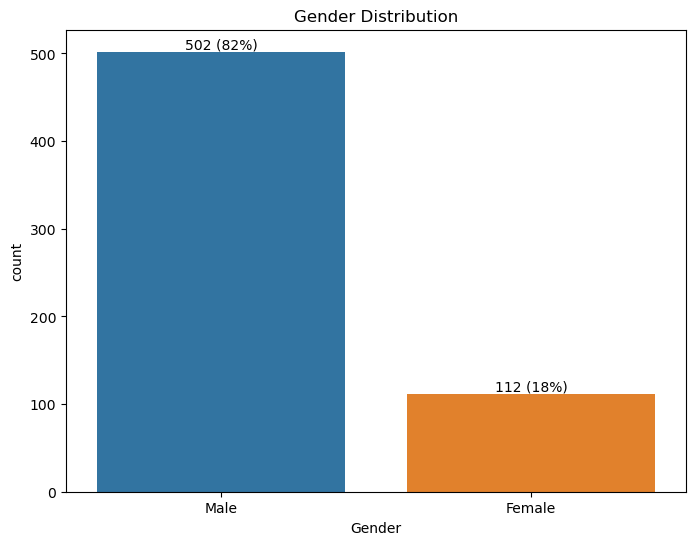

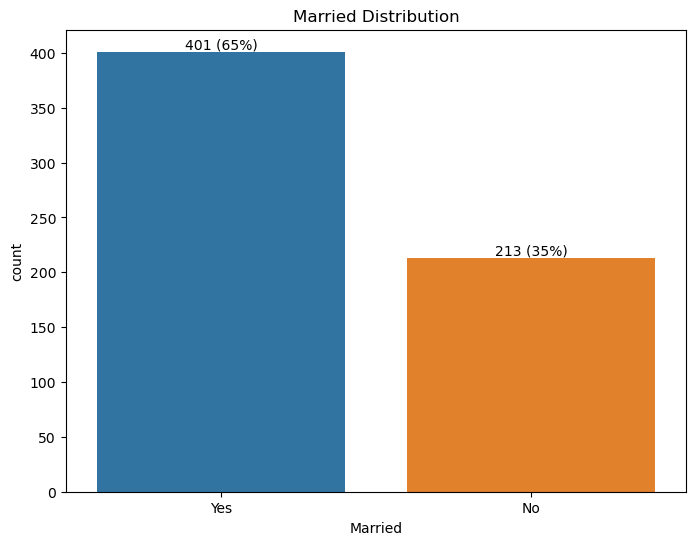

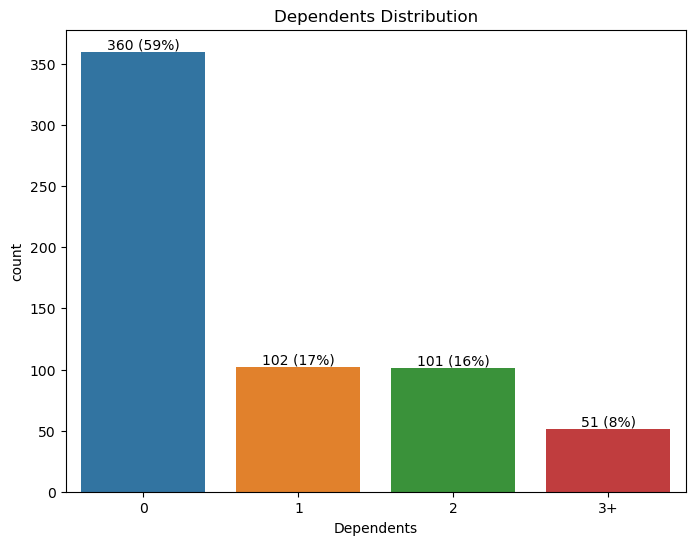

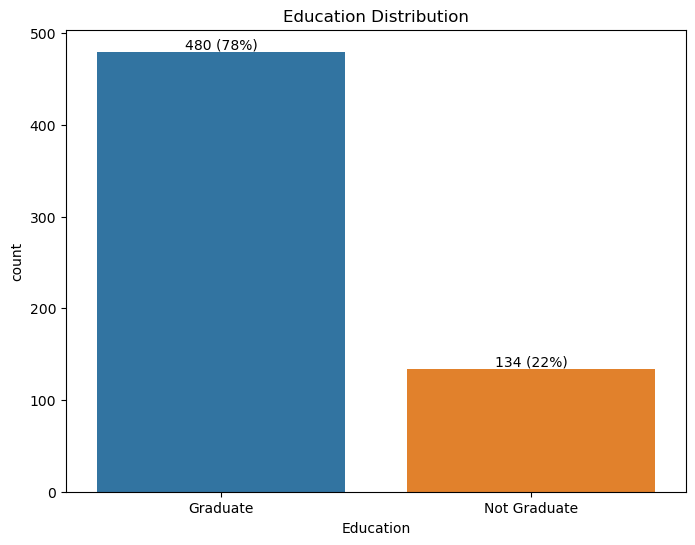

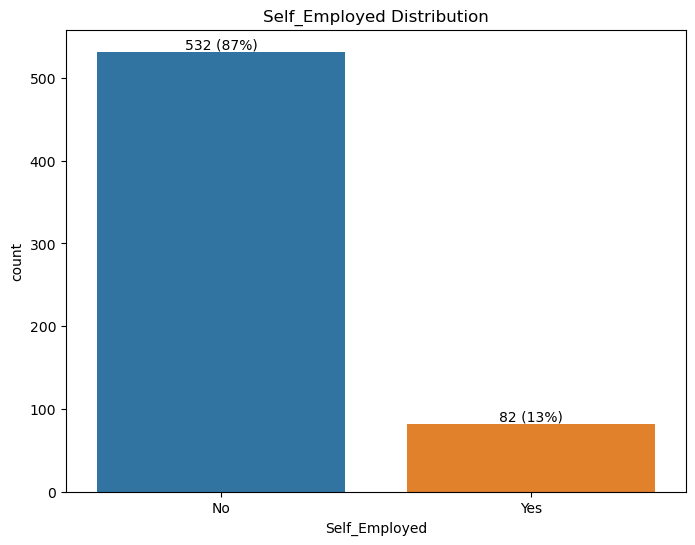

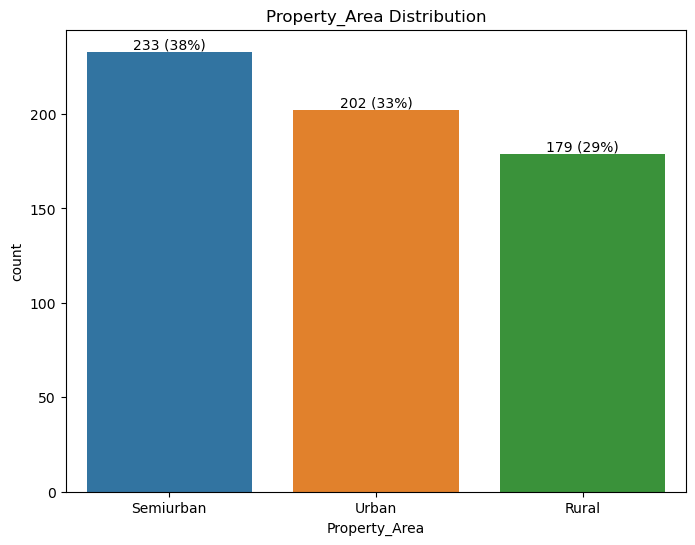

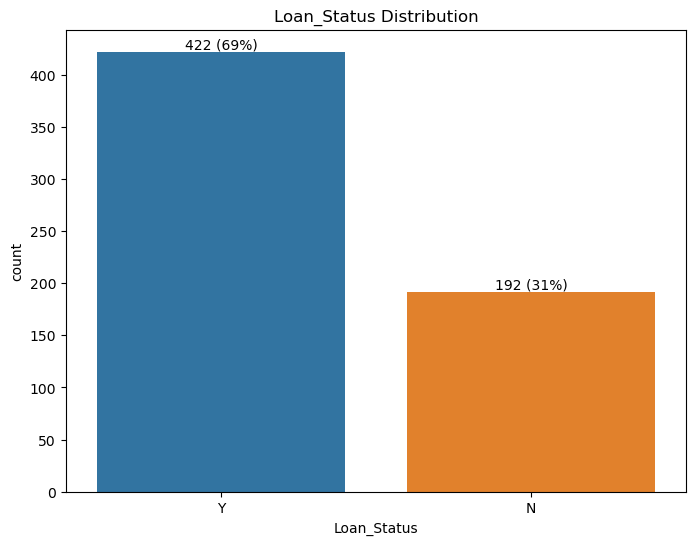

In [11]:
def plot_cat_cols(data, cat_cols):
    for col in cat_cols:
        plt.figure(figsize=(8, 6))
        ax = sns.countplot(data=data, x=col, order=data[col].value_counts().index)
        
        abs_values = data[col].value_counts(ascending=False)
        rel_values = data[col].value_counts(ascending=False, normalize=True).values * 100

        labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
        ax.bar_label(ax.containers[0], labels=labels)
        
        plt.title(f"{col} Distribution")
        plt.show()

plot_cat_cols(train, cat_cols[1:])

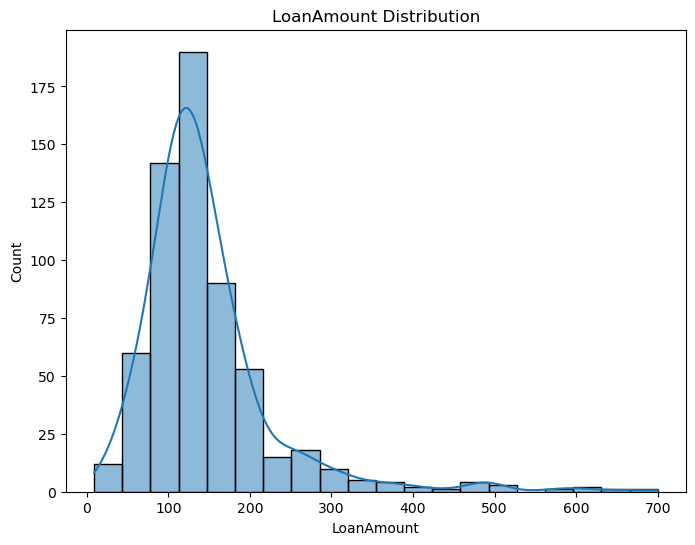

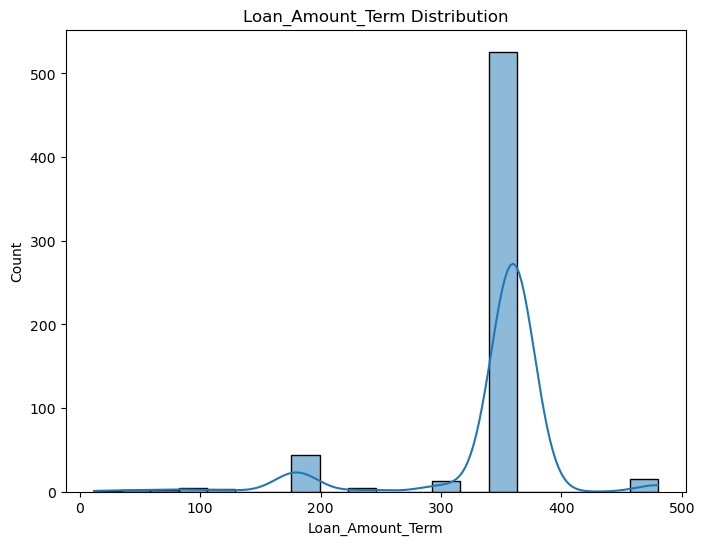

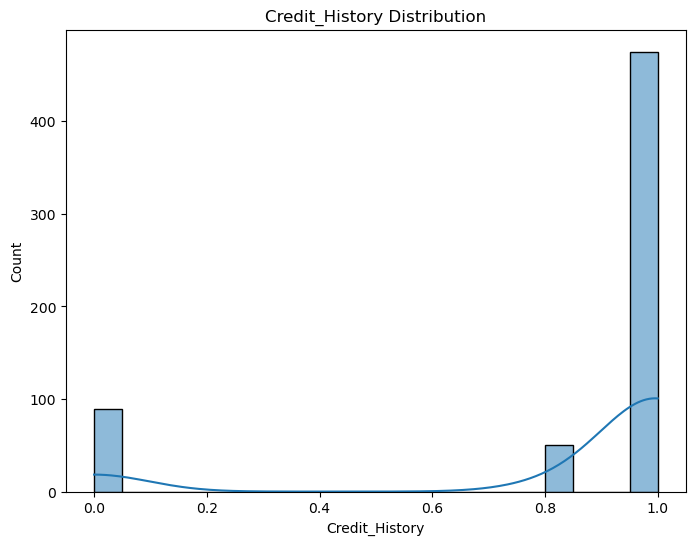

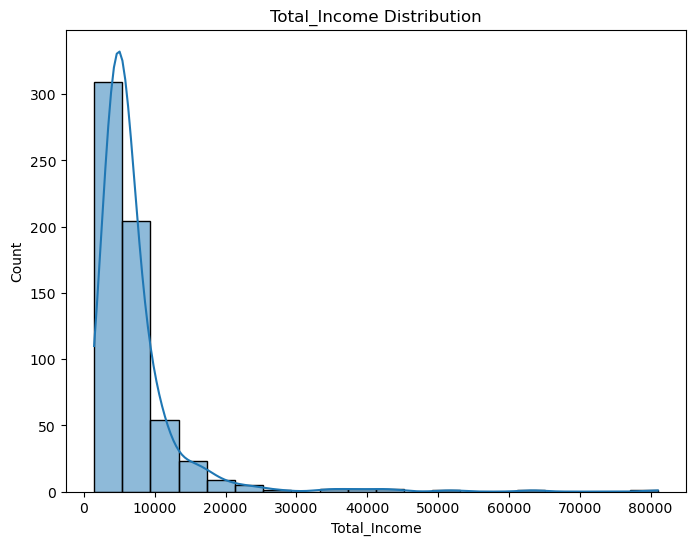

In [12]:
def plot_num_cols(data, num_cols):
    for col in num_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(data[col], bins=20, kde=True)
        
        plt.title(f"{col} Distribution")
        plt.show()
        
plot_num_cols(train,num_cols)

In [13]:
print("Before LabelEncoder:")
display(train[cat_cols[1:]].head(1))

label_encoders = {}

for col in cat_cols[1:]:
    label_encoders[col] = LabelEncoder()
    train[col] = label_encoders[col].fit_transform(train[col])

print("After LabelEncoder:")
display(train[cat_cols[1:]].head(1))

print("Before Scaling:")
display(train[num_cols].head(1))

scalers = {}
for col in num_cols:
    scalers[col] = StandardScaler()
    train[col] = scalers[col].fit_transform(train[[col]])
    
print("After Scaling:")
display(train[num_cols].head(1))

Before LabelEncoder:


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y


After LabelEncoder:


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1


Before Scaling:


,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
0,146.412162,360.0,1.0,5849.0


After Scaling:


,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
0,0.0,0.279851,0.45164,-0.182184


In [14]:
X = train.drop(['Loan_ID','Loan_Status'],axis=1)
y = train["Loan_Status"]

from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)

print(X_train_sm.shape, X_test.shape)

(684, 10) (123, 10)


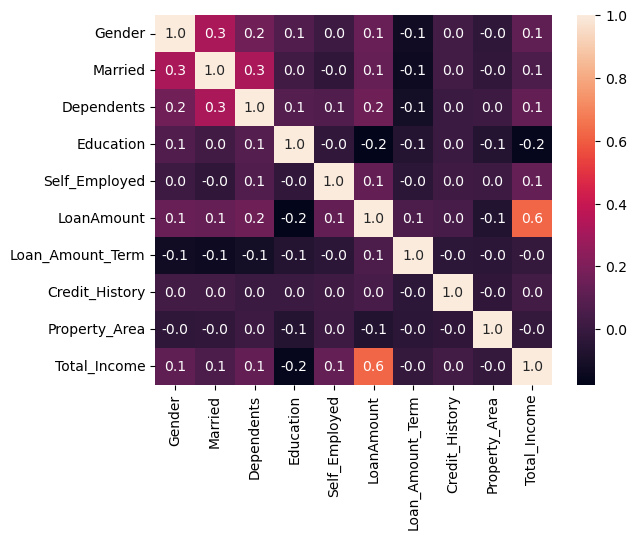

In [15]:
sns.heatmap(X_train_sm.corr(), annot=True, fmt='.1f');

In [16]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
knc = KNeighborsClassifier()
svm = SVC()
gnb = GaussianNB()
cat = CatBoostClassifier()

models = [lr,dtc,rf,xgb,knc,svm,gnb,cat]

In [17]:
for m in models:
    m.fit(X_train_sm,y_train_sm)
    print(m)
    y_pred = m.predict(X_test)
    print(classification_report(y_pred,y_test))

LogisticRegression()
              precision    recall  f1-score   support

           0       0.51      0.69      0.59        32
           1       0.88      0.77      0.82        91

    accuracy                           0.75       123
   macro avg       0.69      0.73      0.70       123
weighted avg       0.78      0.75      0.76       123

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.51      0.52      0.52        42
           1       0.75      0.74      0.75        81

    accuracy                           0.67       123
   macro avg       0.63      0.63      0.63       123
weighted avg       0.67      0.67      0.67       123

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.47      0.59      0.52        34
           1       0.82      0.74      0.78        89

    accuracy                           0.70       123
   macro avg       0.65      0.66      0.65       123
wei

159:	learn: 0.4624417	total: 379ms	remaining: 1.99s
160:	learn: 0.4620550	total: 381ms	remaining: 1.98s
161:	learn: 0.4613900	total: 383ms	remaining: 1.98s
162:	learn: 0.4607241	total: 385ms	remaining: 1.98s
163:	learn: 0.4603396	total: 387ms	remaining: 1.97s
164:	learn: 0.4595892	total: 389ms	remaining: 1.97s
165:	learn: 0.4589033	total: 391ms	remaining: 1.96s
166:	learn: 0.4582450	total: 393ms	remaining: 1.96s
167:	learn: 0.4578410	total: 395ms	remaining: 1.96s
168:	learn: 0.4578000	total: 396ms	remaining: 1.95s
169:	learn: 0.4571274	total: 398ms	remaining: 1.94s
170:	learn: 0.4565580	total: 400ms	remaining: 1.94s
171:	learn: 0.4559515	total: 402ms	remaining: 1.93s
172:	learn: 0.4553229	total: 404ms	remaining: 1.93s
173:	learn: 0.4547660	total: 405ms	remaining: 1.92s
174:	learn: 0.4543614	total: 407ms	remaining: 1.92s
175:	learn: 0.4536724	total: 409ms	remaining: 1.91s
176:	learn: 0.4531040	total: 411ms	remaining: 1.91s
177:	learn: 0.4526607	total: 412ms	remaining: 1.9s
178:	learn: 0

370:	learn: 0.3717953	total: 768ms	remaining: 1.3s
371:	learn: 0.3710610	total: 770ms	remaining: 1.3s
372:	learn: 0.3706752	total: 771ms	remaining: 1.3s
373:	learn: 0.3703888	total: 773ms	remaining: 1.29s
374:	learn: 0.3698969	total: 775ms	remaining: 1.29s
375:	learn: 0.3694531	total: 777ms	remaining: 1.29s
376:	learn: 0.3689751	total: 779ms	remaining: 1.29s
377:	learn: 0.3687741	total: 780ms	remaining: 1.28s
378:	learn: 0.3684194	total: 782ms	remaining: 1.28s
379:	learn: 0.3679390	total: 783ms	remaining: 1.28s
380:	learn: 0.3674826	total: 785ms	remaining: 1.27s
381:	learn: 0.3672142	total: 787ms	remaining: 1.27s
382:	learn: 0.3670423	total: 789ms	remaining: 1.27s
383:	learn: 0.3667447	total: 791ms	remaining: 1.27s
384:	learn: 0.3662652	total: 792ms	remaining: 1.26s
385:	learn: 0.3660266	total: 794ms	remaining: 1.26s
386:	learn: 0.3657822	total: 796ms	remaining: 1.26s
387:	learn: 0.3654186	total: 797ms	remaining: 1.26s
388:	learn: 0.3649994	total: 799ms	remaining: 1.25s
389:	learn: 0.3

590:	learn: 0.3090229	total: 1.17s	remaining: 806ms
591:	learn: 0.3088056	total: 1.17s	remaining: 805ms
592:	learn: 0.3086271	total: 1.17s	remaining: 803ms
593:	learn: 0.3082755	total: 1.17s	remaining: 800ms
594:	learn: 0.3080747	total: 1.17s	remaining: 798ms
595:	learn: 0.3077387	total: 1.17s	remaining: 796ms
596:	learn: 0.3076004	total: 1.18s	remaining: 794ms
597:	learn: 0.3073417	total: 1.18s	remaining: 793ms
598:	learn: 0.3071068	total: 1.18s	remaining: 791ms
599:	learn: 0.3068770	total: 1.18s	remaining: 789ms
600:	learn: 0.3065412	total: 1.18s	remaining: 787ms
601:	learn: 0.3062926	total: 1.19s	remaining: 784ms
602:	learn: 0.3059188	total: 1.19s	remaining: 782ms
603:	learn: 0.3057056	total: 1.19s	remaining: 780ms
604:	learn: 0.3055162	total: 1.19s	remaining: 778ms
605:	learn: 0.3052021	total: 1.19s	remaining: 776ms
606:	learn: 0.3050779	total: 1.2s	remaining: 774ms
607:	learn: 0.3049459	total: 1.2s	remaining: 772ms
608:	learn: 0.3047054	total: 1.2s	remaining: 770ms
609:	learn: 0.3

781:	learn: 0.2677526	total: 1.56s	remaining: 435ms
782:	learn: 0.2674440	total: 1.56s	remaining: 433ms
783:	learn: 0.2672566	total: 1.57s	remaining: 431ms
784:	learn: 0.2671372	total: 1.57s	remaining: 429ms
785:	learn: 0.2669571	total: 1.57s	remaining: 428ms
786:	learn: 0.2666988	total: 1.57s	remaining: 426ms
787:	learn: 0.2663956	total: 1.57s	remaining: 424ms
788:	learn: 0.2661561	total: 1.58s	remaining: 422ms
789:	learn: 0.2658713	total: 1.58s	remaining: 420ms
790:	learn: 0.2657417	total: 1.58s	remaining: 418ms
791:	learn: 0.2655839	total: 1.58s	remaining: 416ms
792:	learn: 0.2653985	total: 1.59s	remaining: 414ms
793:	learn: 0.2652322	total: 1.59s	remaining: 412ms
794:	learn: 0.2651082	total: 1.59s	remaining: 410ms
795:	learn: 0.2648471	total: 1.59s	remaining: 408ms
796:	learn: 0.2646347	total: 1.59s	remaining: 406ms
797:	learn: 0.2644991	total: 1.6s	remaining: 404ms
798:	learn: 0.2643413	total: 1.6s	remaining: 402ms
799:	learn: 0.2640232	total: 1.6s	remaining: 401ms
800:	learn: 0.2

987:	learn: 0.2297711	total: 1.96s	remaining: 23.8ms
988:	learn: 0.2296240	total: 1.96s	remaining: 21.8ms
989:	learn: 0.2294486	total: 1.96s	remaining: 19.8ms
990:	learn: 0.2292221	total: 1.96s	remaining: 17.8ms
991:	learn: 0.2290782	total: 1.97s	remaining: 15.8ms
992:	learn: 0.2289026	total: 1.97s	remaining: 13.9ms
993:	learn: 0.2288128	total: 1.97s	remaining: 11.9ms
994:	learn: 0.2286825	total: 1.97s	remaining: 9.9ms
995:	learn: 0.2285553	total: 1.97s	remaining: 7.92ms
996:	learn: 0.2284689	total: 1.97s	remaining: 5.94ms
997:	learn: 0.2283398	total: 1.97s	remaining: 3.96ms
998:	learn: 0.2281307	total: 1.98s	remaining: 1.98ms
999:	learn: 0.2279469	total: 1.98s	remaining: 0us
              precision    recall  f1-score   support

           0       0.47      0.62      0.53        32
           1       0.85      0.75      0.80        91

    accuracy                           0.72       123
   macro avg       0.66      0.69      0.66       123
weighted avg       0.75      0.72      0.73

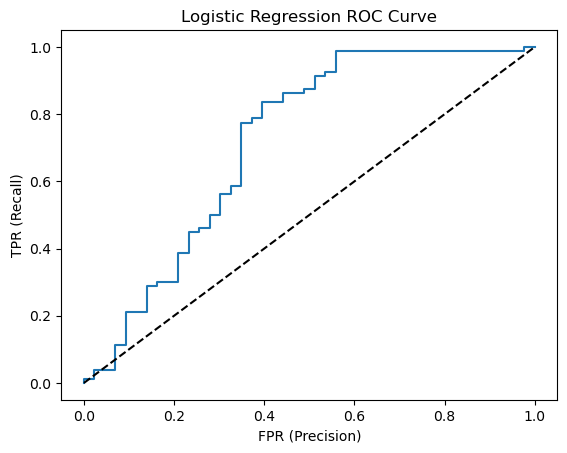

Area under curve (AUC):  0.7188953488372093


In [18]:
#plotting ROC-AUC curve for LR
y_score = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test.astype('int'), y_score)

plt.title('Logistic Regression ROC Curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

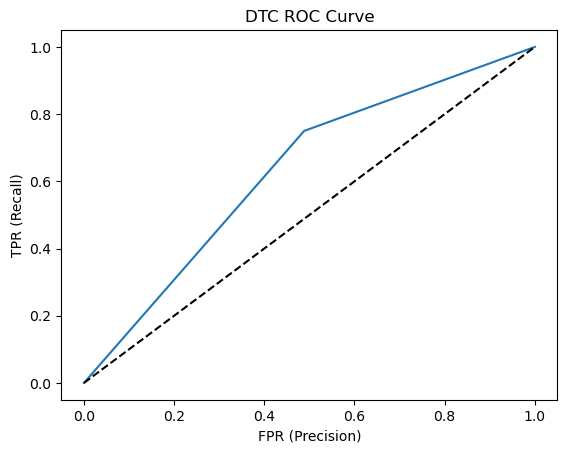

Area under curve (AUC):  0.6308139534883721


In [19]:
#plotting ROC-AUC curve for DTC
y_score = dtc.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test.astype('int'), y_score)

plt.title('DTC ROC Curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

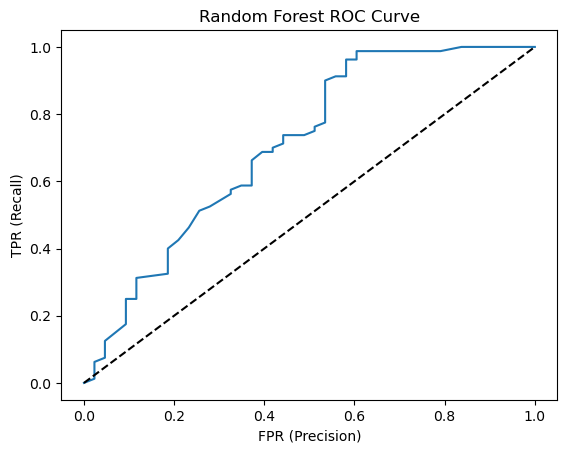

Area under curve (AUC):  0.7075581395348838


In [20]:
#plotting ROC-AUC curve for RandomForestClassifer
y_score = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test.astype('int'), y_score)

plt.title('Random Forest ROC Curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

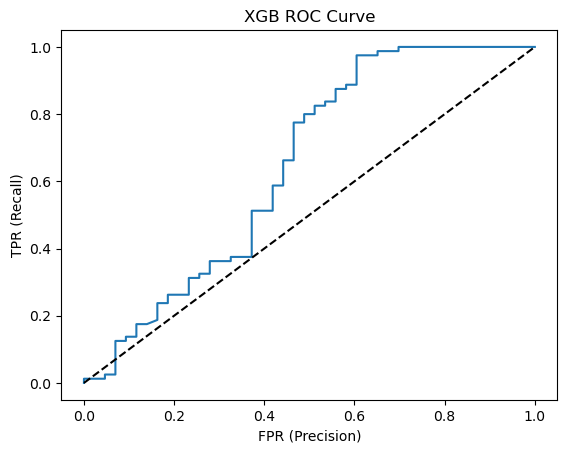

Area under curve (AUC):  0.645203488372093


In [21]:
#plotting ROC-AUC curve for XGBC
y_score = xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test.astype('int'), y_score)

plt.title('XGB ROC Curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

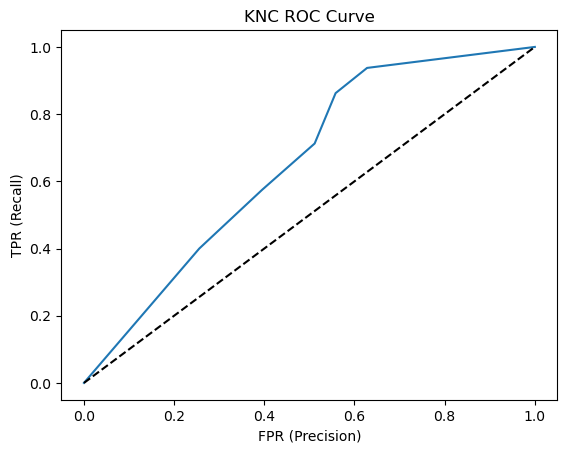

Area under curve (AUC):  0.6539244186046511


In [22]:
#plotting ROC-AUC curve for KNC
y_score = knc.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test.astype('int'), y_score)

plt.title('KNC ROC Curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

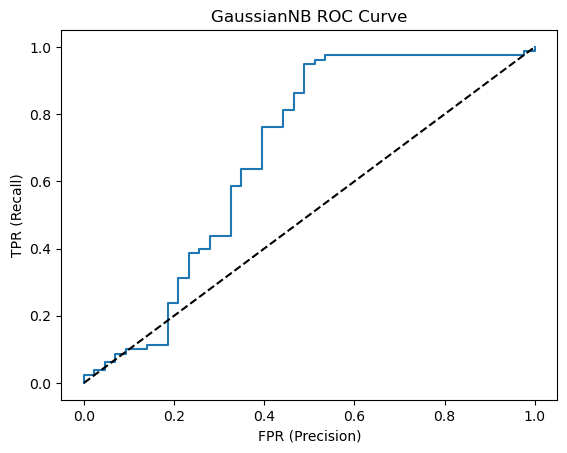

Area under curve (AUC):  0.6822674418604651


In [23]:
#plotting ROC-AUC curve for GaussianNB
y_score = gnb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test.astype('int'), y_score)

plt.title('GaussianNB ROC Curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

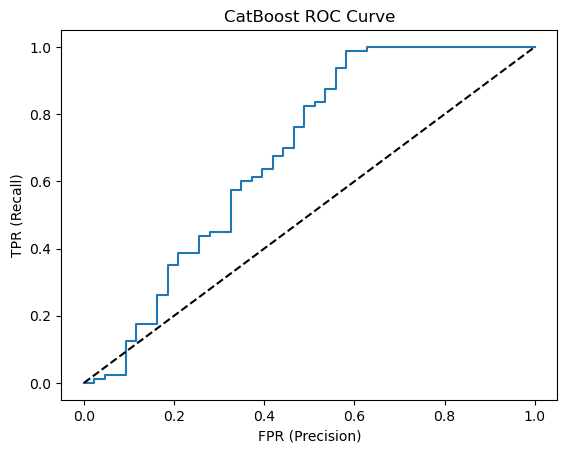

Area under curve (AUC):  0.6808139534883721


In [24]:
#plotting ROC-AUC curve for CatBoost
y_score = cat.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test.astype('int'), y_score)

plt.title('CatBoost ROC Curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [25]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=5,
    verbose=1
)

model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256, input_shape = (11,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train_sm,y_train_sm,validation_data=(X_test, y_test),epochs=2000, callbacks=callback)

Epoch 1/2000
22/22 [==============================] - 1s 13ms/step - loss: 0.7673 - accuracy: 0.5307 - val_loss: 0.6837 - val_accuracy: 0.6016
Epoch 2/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7058 - accuracy: 0.5263 - val_loss: 0.6860 - val_accuracy: 0.4715
Epoch 3/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7024 - accuracy: 0.5365 - val_loss: 0.6700 - val_accuracy: 0.6504
Epoch 4/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.5380 - val_loss: 0.6747 - val_accuracy: 0.5285
Epoch 5/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5292 - val_loss: 0.6657 - val_accuracy: 0.6585
Epoch 6/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.5746 - val_loss: 0.6441 - val_accuracy: 0.7561
Epoch 7/2000
22/22 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.5789 - val_loss: 0.6215 - val_accuracy: 0.7642
Epoch

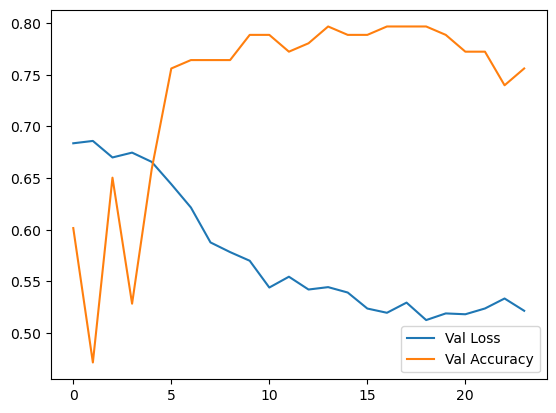

In [26]:
plt.plot(history.history["val_loss"]);
plt.plot(history.history["val_accuracy"]);

plt.legend(["Val Loss", "Val Accuracy"]);

In [27]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.5216 - accuracy: 0.7561


[0.5215734839439392, 0.7560975551605225]

In [28]:
y_pred = model.predict(X_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
accuracy_score(y_pred,y_test)

4/4 [==============================] - 0s 2ms/step


0.7560975609756098

In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.47      0.74      0.57        27
           1       0.91      0.76      0.83        96

    accuracy                           0.76       123
   macro avg       0.69      0.75      0.70       123
weighted avg       0.81      0.76      0.77       123



4/4 [==============================] - 0s 2ms/step


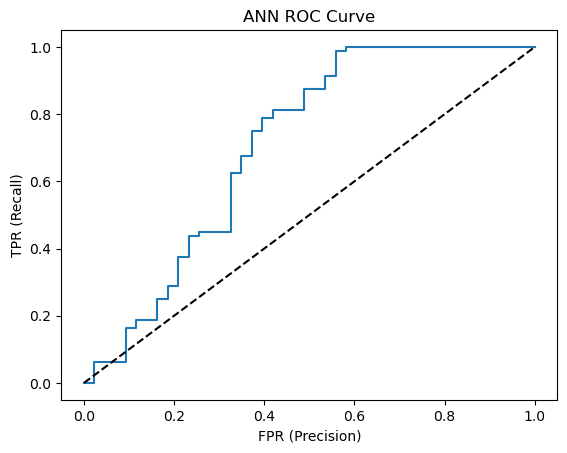

Area under curve (AUC):  0.7058139534883721


In [30]:
#plotting ROC-AUC curve for ANN
y_score = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test.astype('int'), y_score)

plt.title('ANN ROC Curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

### Apply the model on the Test set

In [31]:
test = pd.read_csv(r"C:\Users\Atharva\Desktop\rxib\Deep Learning codebasics\Loan Prediction\test_Y3wMUE5_7gLdaTN.csv")
test.drop(['Loan_ID'],axis=1,inplace=True)
test["Total_Income"] = test["ApplicantIncome"] + test['CoapplicantIncome']
test.drop(["ApplicantIncome",'CoapplicantIncome'],axis=1,inplace=True)
cat_cols = []
num_cols = []
other_cols = []

for i in test.columns:
    if test[i].dtype == 'object':
        cat_cols.append(i)
    elif test[i].dtype == 'int64' or test[i].dtype == 'float64':
        num_cols.append(i)
    else:
        other_cols.append(i)

for i in cat_cols:
    test[i] = test[i].fillna(test[i].mode()[0])
    
for i in num_cols:
    test[i] = test[i].fillna(test[i].mean())
    
for i in cat_cols:
    test[i] = label_encoders[i].transform(test[i])
    
for i in num_cols:
    test[i] = scalers[i].transform(test[[i]])

In [32]:
pred_proba = model.predict(test)

12/12 [==============================] - 0s 1ms/step


In [33]:
pred = [1 if i>=0.5 else 0 for i in pred_proba]
test["Loan_Status"] = pred
test["Probability"] = pred_proba

In [34]:
test.head(1)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status,Probability
0,1,1,0,0,0,-0.433638,0.279851,0.45164,2,-0.202173,1,0.752121


In [35]:
def predict():
    
    Gender = input("Enter Gender (Male/Female):")
    Married = input("Enter Marital Status (Yes/No):")
    Dependents = input("Enter No. of Dependents (0/1/2/3+):")
    Education = input("Enter Education (Graduate/Not Graduate):")
    Self_Employed = input("Are you Self Employed? (Yes/No):")
    LoanAmount = float(input("Enter Loan Amount:"))
    Loan_Amount_Term = float(input("Enter Loan Amount Term:"))
    Credit_History = float(input("Enter Credit History:"))
    Property_Area = input("Enter Property Area Type (Urban/Semiurban/Rural):")
    Total_Income = float(input("Enter Total Income:"))
    
    Gender = label_encoders["Gender"].transform([Gender])
    Married = label_encoders["Married"].transform([Married])
    Dependents = label_encoders["Dependents"].transform([Dependents])
    Education = label_encoders["Education"].transform([Education])
    Self_Employed = label_encoders["Self_Employed"].transform([Self_Employed])
    Property_Area = label_encoders["Property_Area"].transform([Property_Area])
    
    LoanAmount = scalers['LoanAmount'].transform([[LoanAmount]])
    Loan_Amount_Term = scalers['Loan_Amount_Term'].transform([[Loan_Amount_Term]])
    Credit_History = scalers['Credit_History'].transform([[Credit_History]])
    Total_Income = scalers['Total_Income'].transform([[Total_Income]])
    
    pred = best_model.predict([[Gender,Married,Dependents,
            Education,Self_Employed,
            LoanAmount,Loan_Amount_Term,
            Credit_History,Property_Area,
            Total_Income]])
    pred = pred[0]
    
    try:
        if pred == 0:
            print("Not Approved")
        else:
            print("Approved")
        
    except ValueError:
        print("An Error Occured")

In [36]:
# predict()

In [37]:
with open(r'C:\Users\Atharva\Desktop\rxib\Deep Learning codebasics\Loan Prediction\ANN_Loan_Prediction.pkl', 'wb') as file:
    pickle.dump(model, file)
    
with open(r'C:\Users\Atharva\Desktop\rxib\Deep Learning codebasics\Loan Prediction\Loan_Prediction_scaler.pkl', 'wb') as file:
    pickle.dump(scalers, file)
    
with open(r'C:\Users\Atharva\Desktop\rxib\Deep Learning codebasics\Loan Prediction\Loan_Prediction_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)